# Assignment 1


#### Libraries

In [788]:
import numpy as np  # this library was used to provide some comprehesive and effective mathematical function
import pandas as pd # this library was used to read given dataset as well as for handling missing data
import matplotlib.pyplot as plt # this library was used to create visualisations
import seaborn as sns  # this library was also used for visualisation creation as we did with matplotlib
from sklearn.metrics import r2_score # this was used to evaluate the perfomance of the regression
from sklearn.linear_model import LinearRegression # this was used to fit our regression model as well as to perform predictions
import statsmodels.api as sm
from datetime import datetime as dt # this was used to give the date a desire format and to assigned the date their corresponding days of the week
import warnings # this was used to filter warning in my code
warnings.filterwarnings('ignore')


## Task 1

The first task was to download historical daily weather data for France and load it into my environment so that I could use it. I also had to use linear interpolation to fill any gaps in the data.

In [789]:
# converting the daily weather csv file  into a DataFrame
daily_weather=pd.read_csv('Paris_weather_data_2017.csv',header= 0,encoding= 'unicode_escape') 

In [790]:
# checking the first five rows of a created DataFrame
daily_weather.head()

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),...,avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),high Gust Wind (km/h),sum Precip. (mm),Events
0,1/1/2017,0,-3,-5,-1,-3,-6,100,94,86,...,1023,1020,7.0,3.0,0.0,10,6,-,0,Fog
1,1/2/2017,2,0,-2,1,1,-1,100,95,88,...,1025,1022,14.0,4.0,0.0,16,6,-,2,"Fog , Rain , Snow"
2,1/3/2017,1,0,-1,1,0,-1,100,95,88,...,1030,1028,7.0,2.0,0.0,14,6,-,0,Fog
3,1/4/2017,6,2,-1,4,1,-1,100,87,71,...,1025,1023,19.0,9.0,3.0,23,14,-,2,Rain
4,1/5/2017,7,3,1,2,0,-2,93,79,59,...,1032,1027,19.0,12.0,10.0,14,11,-,0,NaN


In [791]:
len(daily_weather.columns)

21

### Checking the quantity of missing data

In [792]:
# checking the number of missing data in each column of our dataframe
daily_weather.isnull().sum()

Date                             0
high Temp. (°C)                  0
avg Temp. (°C)                   0
low Temp. (°C)                   0
high Dew Point (°C)              0
avg Dew Point (°C)               0
low Dew Point (°C)               0
high Humidity (%)                0
avg Humidity (%)                 0
low Humidity (%)                 0
high Sea Level Press. (hPa)      0
avg Sea Level Press. (hPa)       0
low Sea Level Press. (hPa)       0
high Visibility (km)             2
avg Visibility (km)              2
low Visibility (km)              2
high Wind (km/h)                 0
avg Wind (km/h)                  0
high Gust Wind (km/h)            0
sum Precip. (mm)                 0
Events                         139
dtype: int64

#### i. Checking the percentage of missing data

In [793]:
# creating a function that check the number of missing data in  each column of our dataframe in percentage
def percent_missing(daily_weather):
    percent_nan = 100* daily_weather.isnull().sum() / len(daily_weather)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [794]:
# checking the number of missing data in  each column of our dataframe in percentage
percent_nan = percent_missing(daily_weather)
percent_nan

high Visibility (km)     0.547945
avg Visibility (km)      0.547945
low Visibility (km)      0.547945
Events                  38.082192
dtype: float64

### b. Dealing with missing data

#### i. Deleting unnecessary columns

In [795]:
# removing unnecessary columns to have a viable dataframe
daily_weather=daily_weather.drop(columns=['Events'],axis=1)
daily_weather=daily_weather.drop(daily_weather.columns[-2],axis=1)

In [796]:
daily_weather

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm)
0,1/1/2017,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
1,1/2/2017,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2,1/3/2017,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
3,1/4/2017,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
4,1/5/2017,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2017,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4
361,12/28/2017,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0
362,12/29/2017,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12
363,12/30/2017,14,10,6,12,10,4,100,87,73,1011,1006,1000,19.0,9.0,3.0,32,19,3


#### ii. Filling the gap with linear interpolation

In [797]:
# filling the missing values by default
daily_weather=daily_weather.interpolate()

#### iii. Checking the percentage of missing data

In [798]:
# checking if there no longer missing values
percent_nan = percent_missing(daily_weather)
percent_nan

Series([], dtype: float64)

## Task 2

The main goal of this section was to compute the correlation matrix between all of the weather variables and to create a graph that displayed the correlation matrix as a heat-map.

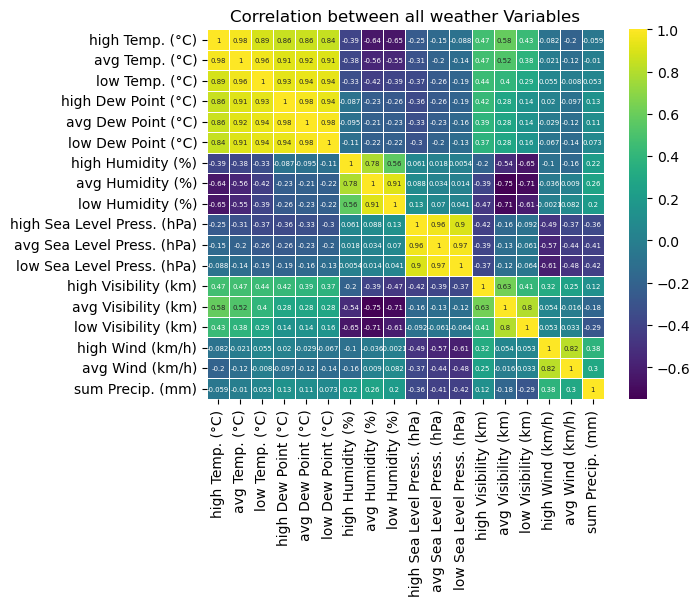

In [799]:
# Checking the relationship between our dataframe's columns

correlation_matrix=daily_weather.corr()
sns.heatmap(correlation_matrix,linewidth=0.5,cmap='viridis',annot=True, annot_kws={'size': 5});
plt.title('Correlation between all weather Variables');
plt.savefig("heatmap.png")

## Task 3

In this task, I had to download a 2017 historical daily electricity consumption data set for France and load it into my environment so that I could use it alongside the previously loaded daily weather data set.

In [800]:
# converting the daily electricity consumption csv file  into a DataFrame
daily_electricity=pd.read_csv('Historique_consommation_JOUR_2017.csv', skiprows=17)

In [801]:
# checking the first five rows of a created DataFrame
daily_electricity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Date,Type de données,Energie journalière (MWh)
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,01/01/2017,Définitives,1652084.0
2,NaN,NaN,NaN,02/01/2017,Définitives,1768332.0
3,NaN,NaN,NaN,03/01/2017,Définitives,1886120.0
4,NaN,NaN,NaN,04/01/2017,Définitives,1923775.0


#### i.Extracting needed data 

In [802]:
# removing un filled columns as well as unnecessary columns
if daily_electricity.columns[0] in daily_electricity.columns:
    daily_electricity.drop(daily_electricity.columns[0:3],axis=1, inplace=True)
    daily_electricity.drop(daily_electricity.columns[1],axis=1, inplace=True)

daily_electricity

,Date,Energie journalière (MWh)
0,NaN,NaN
1,01/01/2017,1652084.0
2,02/01/2017,1768332.0
3,03/01/2017,1886120.0
4,04/01/2017,1923775.0
...,...,...
372,27/12/2017,1582970.0
373,28/12/2017,1664743.0
374,29/12/2017,1668623.0
375,30/12/2017,1437082.0


In [803]:
# removing unnecessary rows 
daily_electricity.drop([0],axis=0,inplace=True)
daily_electricity.head()

,Date,Energie journalière (MWh)
1,01/01/2017,1652084.0
2,02/01/2017,1768332.0
3,03/01/2017,1886120.0
4,04/01/2017,1923775.0
5,05/01/2017,1887470.0


#### ii. Checking the percentage of missing data

In [804]:
# checking if there no longer missing values
percent_nan = percent_missing(daily_electricity)
percent_nan

Date                         2.925532
Energie journalière (MWh)    2.925532
dtype: float64

In [805]:
# checking if the number of missing values in each column
daily_electricity.isnull().sum()

Date                         11
Energie journalière (MWh)    11
dtype: int64

#### iii. Taking care of the dates by organising both given data sets to have the same format

In [806]:
# Giving the date column of daily electricity a suitable format 
daily_electricity['Date']= pd.to_datetime(daily_electricity['Date'],dayfirst=True)
daily_electricity.head()

,Date,Energie journalière (MWh)
1,2017-01-01,1652084.0
2,2017-01-02,1768332.0
3,2017-01-03,1886120.0
4,2017-01-04,1923775.0
5,2017-01-05,1887470.0


In [807]:
# Giving the date column of daily weather data frame a suitable format 
daily_weather['Date']=pd.to_datetime(daily_weather['Date'],dayfirst=False)
daily_weather.head()

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm)
0,2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
1,2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2,2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
3,2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
4,2017-01-05,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0


## Task 4

4. Synchronise the dates corresponding to both time series and make a scatter plot of
energy consumption against mean temperature.


#### i. Combining both dataframes by using merge method

In [808]:
# combining both dataframe by merging them
electricity= pd.merge(daily_weather,daily_electricity,on='Date')

In [809]:
electricity.head()

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm),Energie journalière (MWh)
0,2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0,1652084.0
1,2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2,1768332.0
2,2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0,1886120.0
3,2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2,1923775.0
4,2017-01-05,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0,1887470.0


#### ii. Checking the percentage of missing data in electricity dataframe

In [810]:
# Checking if there are missing values
percent_nan = percent_missing(electricity)
percent_nan

Series([], dtype: float64)

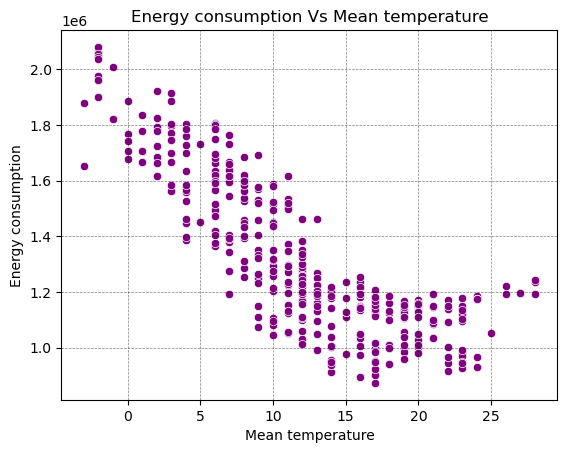

In [811]:
# Ploting the relationship between the daily energy consumed and the daily average temperature
plt.figure(dpi=100)
sns.scatterplot(data=electricity,y=electricity.columns[-1],x=electricity.columns[2],color='purple');
plt.title('Energy consumption Vs Mean temperature');
plt.xlabel('Mean temperature');
plt.ylabel('Energy consumption');
plt.grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5);
plt.savefig("scatterplot1.png")

## Task 5

In this part the task was to fit a quadratic model to the energy versus temperature and to plot the quadratic fit as a line on
top of the scatter plot created in part 4.


In [812]:
# Creating a quadratic model from the equation y= B2*x**2+B1x+B0
model=np.polyfit(electricity[electricity.columns[2]], electricity[electricity.columns[-1]], 2)
model

array([ 1.56746388e+03, -7.14068953e+04,  1.87911356e+06])

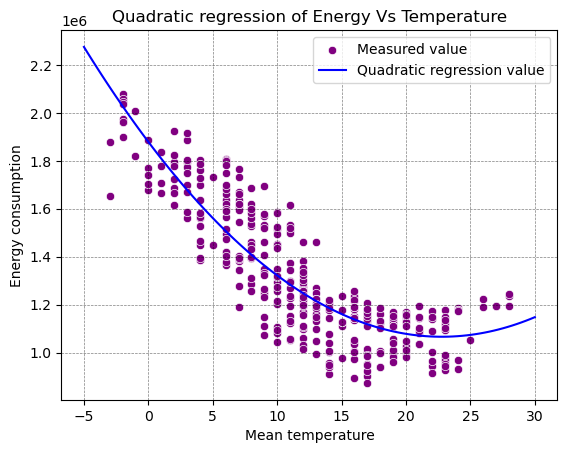

In [813]:
# Ploting both the measured value and the predicted value on the same graph 
plt.figure(dpi=100)
polyline = np.linspace(-5,30, 100)
predicted_cons= 1.56746388e+03*polyline**2+(-7.14068953e+04*polyline)+1.87911356e+06
sns.scatterplot(data=electricity,y=electricity.columns[-1],x=electricity.columns[2],color='purple',label='Measured value');
plt.xlabel('Mean temperature');
plt.ylabel('Energy consumption');
plt.title('Quadratic regression of Energy Vs Temperature')
plt.plot(polyline,predicted_cons,color='blue', label='Quadratic regression value');
plt.grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.legend();
plt.savefig("scatterplot2.png")

## Task 6

The task in this section was to show the optimal temperature that corresponded with the least amount of consumption based on empirical analysis. I had to use the quadratic fit and visually check it.

In [814]:
# An index of the row that consist a minimum consumption
model = np.poly1d(np.polyfit(electricity[electricity.columns[2]], electricity[electricity.columns[-1]], 2)) 
model(polyline).argmin()
print("The optimal temperature that correspond with minimum cunsumtion is:",round(polyline[79],4),'degree Celsius.')

The optimal temperature that correspond with minimum cunsumtion is: 22.9293 degree Celsius.


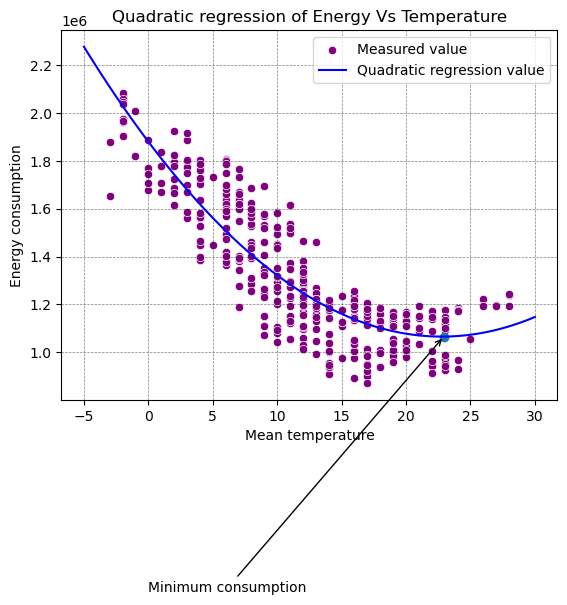

<Figure size 640x480 with 0 Axes>

In [815]:
# Pointing the optimal temperature that correspond with the minimum consumption
plt.figure(dpi=100)
sns.scatterplot(data=electricity,y=electricity.columns[-1],x=electricity.columns[2],color='purple',label='Measured value');
plt.plot(polyline,model(polyline),label='Quadratic regression value',color='blue')
plt.annotate("Minimum consumption", xy=(polyline[79],model(polyline).min()), xytext=(0,0),arrowprops={"arrowstyle":"->", "color":"black"})
plt.title('Quadratic regression of Energy Vs Temperature')
plt.scatter(polyline[79],model(polyline).min())
plt.xlabel('Mean temperature');
plt.ylabel('Energy consumption');
plt.legend()
plt.grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.show()        
plt.savefig("scatterplot3.png")

## Task 7


Here the task was to use a stepwise approach to find an optimal multivariate linear regression model using the
weather variables to forecast consumption and to determine the selected variables as well as
coefficient of determination.

In [816]:
# separating independent variables and dependent variables
X = electricity.iloc[:, 1:-1]  # Independent variables()
y = electricity.iloc[:, -1]    # dependent variables

#### i. Checking the percentage of missing data 

In [817]:
# Checking the missing data in our independent variables
percent_nan = percent_missing(X)
percent_nan

Series([], dtype: float64)

In [818]:
# Checking the missing data in our dependent variables
y.isnull().sum()

0

#### ii. Determining an optimal multivariate linear regression model using the weather variables to forecast consumption

In [819]:
# Performing a stepwise regression
def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

In [820]:
# A list of selected weather variables variables
all_var=forward_regression(X, y,0.05,verbose=False)
all_var

['high Temp.\xa0(°C)',
 'high Visibility\xa0(km)',
 'high Humidity\xa0(%)',
 'avg Temp.\xa0(°C)',
 'low Humidity\xa0(%)',
 'avg Dew Point\xa0(°C)',
 'low Sea Level Press.\xa0(hPa)']

In [821]:
# extracting the selected independent variables after performing a stepwise regression approach
selected_var=X[all_var]
selected_var.head()

,high Temp. (°C),high Visibility (km),high Humidity (%),avg Temp. (°C),low Humidity (%),avg Dew Point (°C),low Sea Level Press. (hPa)
0,0,7.0,100,-3,86,-3,1020
1,2,14.0,100,0,88,1,1022
2,1,7.0,100,0,88,0,1028
3,6,19.0,100,2,71,1,1023
4,7,19.0,93,3,59,0,1027


#### iii. The coefficient of determination

In [822]:
# The coefficient of determination using the score() method of a fitted linear regression 
model = LinearRegression().fit(selected_var, y)
r_sq = model.score(selected_var, y)
r_sq

0.7506437341112865

In [823]:
# The coefficient of determination using the r2_score() function from the sklearn.metrics module
predict = model.predict(selected_var)
r2_score( y,predict)

0.7506437341112865

## Task 8

The task was to increase the number of explanatory variables by including squared terms for each weather variable and to obtain a new model using a stepwise approach. After that, I had to identify the selected variables, calculate the new R2 value, and provide my opinion.


#### i.  Increasing  the number of explanatory variables by  squaring each weather variable

In [824]:
# Checking the list of columns of that hold independent features
X.columns

Index(['high Temp. (°C)', 'avg Temp. (°C)', 'low Temp. (°C)',
       'high Dew Point (°C)', 'avg Dew Point (°C)', 'low Dew Point (°C)',
       'high Humidity (%)', 'avg Humidity (%)', 'low Humidity (%)',
       'high Sea Level Press. (hPa)', 'avg Sea Level Press. (hPa)',
       'low Sea Level Press. (hPa)', 'high Visibility (km)',
       'avg Visibility (km)', 'low Visibility (km)', 'high Wind (km/h)',
       'avg Wind (km/h)', 'sum Precip. (mm)'],
      dtype='object')

In [825]:
X2=electricity.iloc[:, 1:-1]

In [826]:
# Creating a feature variable of X squarred 
X2['high Temp. (°C) sqd']=X[X.columns[0]].apply(lambda x: x**2)
X2['avg Temp. (°C) sqd']=X[X.columns[1]].apply(lambda x: x**2)
X2['low Temp. (°C) sqd']=X[X.columns[2]].apply(lambda x: x**2)
X2['high Dew Point (°C) sqd']=X[X.columns[3]].apply(lambda x: x**2)
X2['avg Dew Point  (°C) sqd']=X[X.columns[4]].apply(lambda x: x**2)
X2['low Dew Point  (°C) sqd']=X[X.columns[5]].apply(lambda x: x**2)
X2['high Humidity (%) sqd']=X[X.columns[6]].apply(lambda x: x**2)
X2['avg Humidity (%) sqd']=X[X.columns[7]].apply(lambda x: x**2)
X2['low Humidity (%) sqd']=X[X.columns[8]].apply(lambda x: x**2)
X2['high Sea Level Press. (hPa) sqd']=X[X.columns[9]].apply(lambda x: x**2)
X2['avg Sea Level Press. (hPa) sqd']=X[X.columns[10]].apply(lambda x: x**2)
X2['low Sea Level Press. (hPa) sqd']=X[X.columns[11]].apply(lambda x: x**2)
X2['high Visibility (km) sqd']=X[X.columns[12]].apply(lambda x: x**2)
X2['avg Visibility (km) sqd']=X[X.columns[13]].apply(lambda x: x**2)
X2['low Visibility (km)) sqd']=X[X.columns[14]].apply(lambda x: x**2)
X2['high Wind (km/h) sqd']=X[X.columns[15]].apply(lambda x: x**2)
X2['sum Precip. (mm) sqd']=X[X.columns[16]].apply(lambda x: x**2)

In [827]:
X2.columns[:18]

Index(['high Temp. (°C)', 'avg Temp. (°C)', 'low Temp. (°C)',
       'high Dew Point (°C)', 'avg Dew Point (°C)', 'low Dew Point (°C)',
       'high Humidity (%)', 'avg Humidity (%)', 'low Humidity (%)',
       'high Sea Level Press. (hPa)', 'avg Sea Level Press. (hPa)',
       'low Sea Level Press. (hPa)', 'high Visibility (km)',
       'avg Visibility (km)', 'low Visibility (km)', 'high Wind (km/h)',
       'avg Wind (km/h)', 'sum Precip. (mm)'],
      dtype='object')

In [828]:
# Combining feature variables in X with the one in Y in the same dataframe
X2=X2.drop(X2.columns[:18],axis=1)
feature_var=pd.concat([X,X2],axis=1)
feature_var.columns
feature_var.head()

,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),...,avg Humidity (%) sqd,low Humidity (%) sqd,high Sea Level Press. (hPa) sqd,avg Sea Level Press. (hPa) sqd,low Sea Level Press. (hPa) sqd,high Visibility (km) sqd,avg Visibility (km) sqd,low Visibility (km)) sqd,high Wind (km/h) sqd,sum Precip. (mm) sqd
0,0,-3,-5,-1,-3,-6,100,94,86,1030,...,8836,7396,1060900,1046529,1040400,49.0,9.0,0.0,100,36
1,2,0,-2,1,1,-1,100,95,88,1030,...,9025,7744,1060900,1050625,1044484,196.0,16.0,0.0,256,36
2,1,0,-1,1,0,-1,100,95,88,1032,...,9025,7744,1065024,1060900,1056784,49.0,4.0,0.0,196,36
3,6,2,-1,4,1,-1,100,87,71,1028,...,7569,5041,1056784,1050625,1046529,361.0,81.0,9.0,529,196
4,7,3,1,2,0,-2,93,79,59,1038,...,6241,3481,1077444,1065024,1054729,361.0,144.0,100.0,196,121


In [829]:
percent_nan = percent_missing(feature_var)
percent_nan

Series([], dtype: float64)

#### ii. Determining an optimal multivariate linear regression model using the weather variables to forecast consumption

In [830]:
# Performing a stepwise regression of the combined feature variables
def forward_regression(feature_var, y,threshold_in,verbose=False):
    
    # Creation of an empty list to hold the selected features 
    initial_list = []
    included = list(initial_list)
    # I made an infinite loop.
    while True:
        changed=False    #I set up a flag to track changes.
        excluded = list(set(feature_var.columns)-set(included))   # Get a list of all the features that have not been selected
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:    # loop over the features that were not chosen.
            
            # Combine the included features and the new feature in an OLS model.
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(feature_var[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

In [831]:
# A list of selected weather variables
all_var_2=forward_regression(feature_var, y,0.05,verbose=False)
all_var_2

['high Temp.\xa0(°C)',
 'high Temp. (°C) sqd',
 'high Visibility (km) sqd',
 'high Visibility\xa0(km)']

In [832]:
# extracting our the selected independent variables after performing a stepwise regression approach
selected_var=feature_var[all_var_2]
selected_var.head()

,high Temp. (°C),high Temp. (°C) sqd,high Visibility (km) sqd,high Visibility (km)
0,0,0,49.0,7.0
1,2,4,196.0,14.0
2,1,1,49.0,7.0
3,6,36,361.0,19.0
4,7,49,361.0,19.0


In [833]:
# The coefficient of determination using the score() method of a fitted linear regression 
model = LinearRegression().fit(selected_var, y)
r_sqd_2= model.score(selected_var, y)
r_sqd_2

0.8068265031072407

In [834]:
# The coefficient of determination using the r2_score() function from the sklearn.metrics module
predict = model.predict(selected_var)
r2_score(y,predict)

0.8068265031072407

## Task 9

The task was to consider the day of the week effect by including dummy variables for the day of the week in the multivariate regression and determine the days of the week chosen for the new model as well as the new R2 value and to provide my opinion.

In [835]:
# creating a DataFrame that consist all 2017 dates and their corresponding days of the week
days = pd.DataFrame(index=electricity['Date'])
days['Monday'] = np.where(days.index.weekday == 0, 1, 0)
days['Tuesday'] = np.where(days.index.weekday == 1, 1, 0)
days['Wednesday'] = np.where(days.index.weekday == 2, 1, 0)
days['Thursday'] = np.where(days.index.weekday == 3, 1, 0)
days['Friday'] = np.where(days.index.weekday == 4, 1, 0)
days['Saturday'] = np.where(days.index.weekday == 5, 1, 0)
days['Sunday'] = np.where(days.index.weekday == 6, 1, 0)

In [836]:
# Checking the created days DataFrame
days.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Date,,,,,,,
2017-01-01,0,0,0,0,0,0,1
2017-01-02,1,0,0,0,0,0,0
2017-01-03,0,1,0,0,0,0,0
2017-01-04,0,0,1,0,0,0,0
2017-01-05,0,0,0,1,0,0,0


In [837]:
days=days.reset_index()
days.head()

,Date,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2017-01-01,0,0,0,0,0,0,1
1,2017-01-02,1,0,0,0,0,0,0
2,2017-01-03,0,1,0,0,0,0,0
3,2017-01-04,0,0,1,0,0,0,0
4,2017-01-05,0,0,0,1,0,0,0


In [838]:
# combining the a  Dataframe that consist X and X squared feature variables with the days DataFrame
feature_var_2=pd.concat([feature_var,days],axis=1)

In [839]:
# removing the date column
feature_var_2=feature_var_2.drop('Date',axis=1)
feature_var_2.head()

,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),...,low Visibility (km)) sqd,high Wind (km/h) sqd,sum Precip. (mm) sqd,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,-3,-5,-1,-3,-6,100,94,86,1030,...,0.0,100,36,0,0,0,0,0,0,1
1,2,0,-2,1,1,-1,100,95,88,1030,...,0.0,256,36,1,0,0,0,0,0,0
2,1,0,-1,1,0,-1,100,95,88,1032,...,0.0,196,36,0,1,0,0,0,0,0
3,6,2,-1,4,1,-1,100,87,71,1028,...,9.0,529,196,0,0,1,0,0,0,0
4,7,3,1,2,0,-2,93,79,59,1038,...,100.0,196,121,0,0,0,1,0,0,0


####  i. Determining an optimal multivariate linear regression model using the weather variables to forecast consumption

In [840]:
# Performing a stepwise regression of the combined feature variables
def forward_regression(feature_var_2, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(feature_var_2.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(feature_var_2[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

In [841]:
# A list of selected weather variables
all_var_3=forward_regression(feature_var_2, y,0.05,verbose=False)
all_var_3

['high Temp.\xa0(°C)',
 'high Temp. (°C) sqd',
 'Sunday',
 'Saturday',
 'avg Temp.\xa0(°C)',
 'low Humidity\xa0(%)',
 'high Wind (km/h) sqd',
 'Monday',
 'sum Precip.\xa0(mm)',
 'avg Temp. (°C) sqd',
 'high Dew Point (°C) sqd']

In [842]:
# extracting our the selected independent variables after performing a stepwise regression approach
selected_var_2=feature_var_2[all_var_3]
selected_var_2.head()

,high Temp. (°C),high Temp. (°C) sqd,Sunday,Saturday,avg Temp. (°C),low Humidity (%),high Wind (km/h) sqd,Monday,sum Precip. (mm),avg Temp. (°C) sqd,high Dew Point (°C) sqd
0,0,0,1,0,-3,86,100,0,0,9,1
1,2,4,0,0,0,88,256,1,2,0,1
2,1,1,0,0,0,88,196,0,0,0,1
3,6,36,0,0,2,71,529,0,2,4,16
4,7,49,0,0,3,59,196,0,0,9,4


In [843]:
# The coefficient of determination using the score() method of a fitted linear regression 
model = LinearRegression().fit(selected_var_2, y)
r_sqd_2= model.score(selected_var_2, y)
r_sqd_2

0.8945057843312311

In [844]:
# The coefficient of determination using the r2_score() function from the sklearn.metrics module
predict = model.predict(selected_var_2)
r2_score(y,predict)

0.8945057843312311

## Task 10

The question asks to describe two approaches that could be used to prevent overfitting which I think are 

#### 1. Regularization
A technique used to reduce overfitting and increase the generalization of a model by adding a penalty term to the loss function.Regularization does require additional bias and a search for optimal penalty hyperparameter is needed to find the best model.

#### 2. Cross validation
A more advanced method for dividing data into training and testing sets. By evaluating a model on previously unseen data, cross-validation can help identify whether it is overfitting the training data or generalizing well to new data, and it can help identify the best set of hyperparameters even when we don't have enough data